# Unemployment_Analysis

In [57]:
import warnings
warnings.filterwarnings('ignore')

importing the neccesary libraries needed for the task

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
dataset=pd.read_csv("Unemployment in India.csv")
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [60]:
#checkingthe shape of the dataset
dataset.shape

(768, 7)

In [61]:
#showing information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [62]:
#describing the dataset
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [66]:
#Finding the States in the dataset and count of States
print(dataset["Region"].unique())
print(len(dataset["Region"].unique()))

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']
29


## Data Cleaning

In [68]:
#checking the nullvalues present in the dataset
dataset.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

here there are lot of null values present in the dataset

In [69]:
#checking the duplicates present in the dataset
dataset.duplicated().sum()

27

In [70]:
#Removing the null values present in the dataset
dataset.dropna(inplace=True)
dataset.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [71]:
#checking the coulmn names
dataset.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [72]:
#here column names different changing for our sake.
dataset.columns= ["State","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Area"]
dataset.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area'],
      dtype='object')

In [73]:
#dataset after data cleaning
dataset.head()

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Data Visualization

### Top 10 States with highest unemployment rate

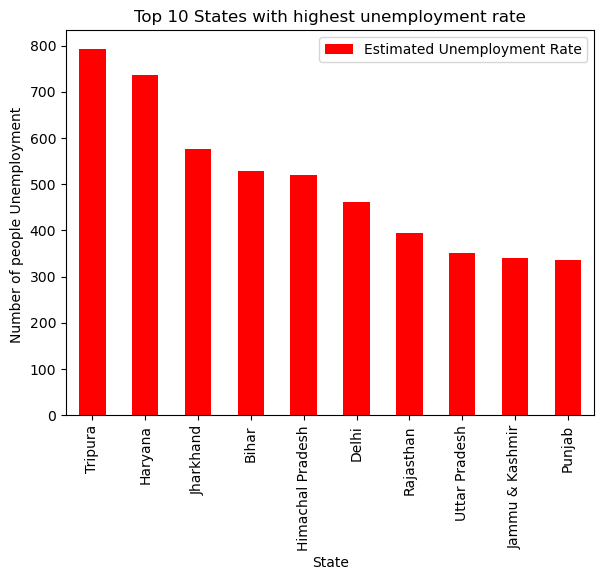

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
data=dataset[['State','Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate',ascending=False)
data[:10].plot(kind='bar',color='red',figsize=(15,5),ax=ax)
ax.set_title('Top 10 States with highest unemployment rate')
ax.set_xlabel('State')
ax.set_ylabel('Number of people Unemployment ')
plt.show()

### Bottom 10 States with unemployment rate

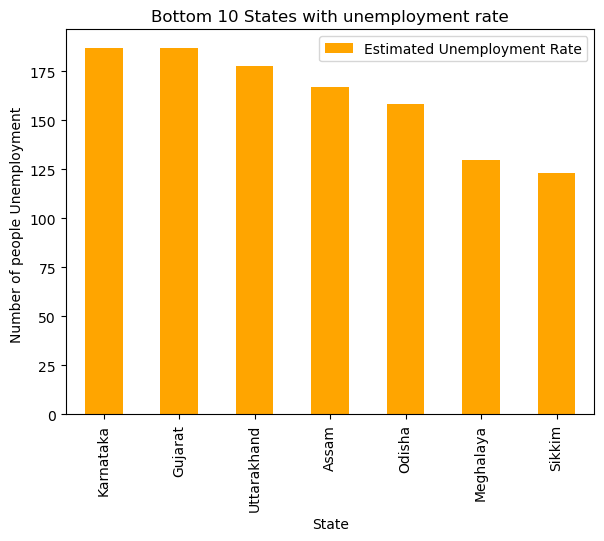

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
data=dataset[['State','Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate',ascending=False)
data[21:30].plot(kind='bar',color='orange',figsize=(15,5),ax=ax)
ax.set_title('Bottom 10 States with unemployment rate')
ax.set_xlabel('State')
ax.set_ylabel('Number of people Unemployment ')
plt.show()

### Top 10 States with highest employment rate

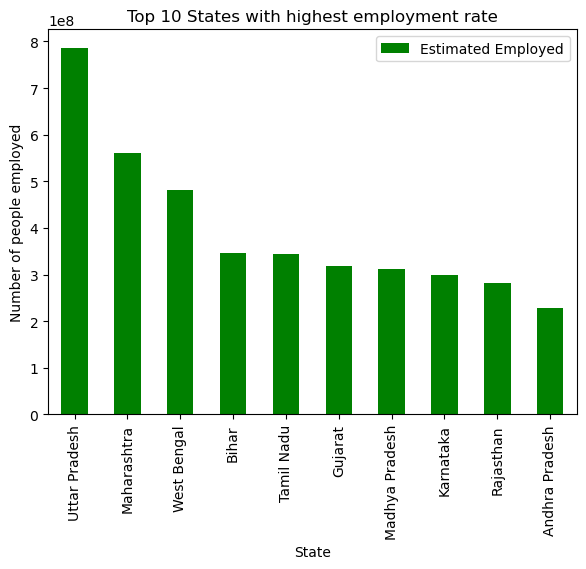

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
data1=dataset[['State','Estimated Employed']].groupby('State').sum().sort_values('Estimated Employed',ascending=False)
data1[:10].plot(kind='bar',color='green',figsize=(15,5),ax=ax)
ax.set_title('Top 10 States with highest employment rate')
ax.set_xlabel('State')
ax.set_ylabel('Number of people employed')
plt.show()

### Bottom 10 States with Employment rate

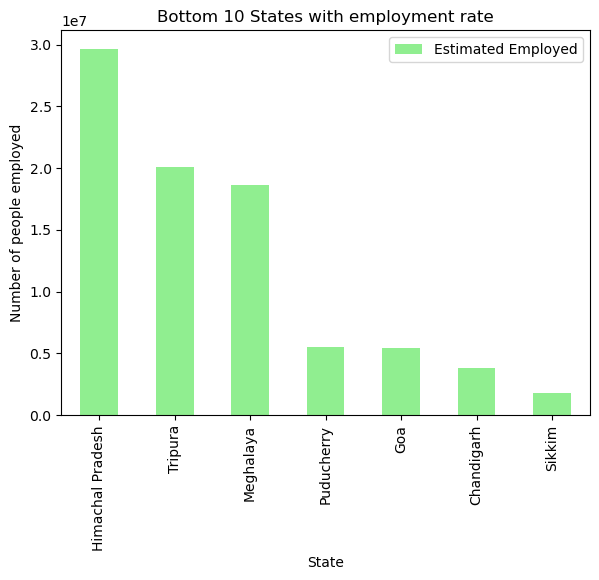

In [86]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
data1=dataset[['State','Estimated Employed']].groupby('State').sum().sort_values('Estimated Employed',ascending=False)
data1[21:30].plot(kind='bar',color='lightgreen',figsize=(15,5),ax=ax)
ax.set_title('Bottom 10 States with employment rate')
ax.set_xlabel('State')
ax.set_ylabel('Number of people employed')
plt.show()

### Indian Unemployment

### Indian Employment

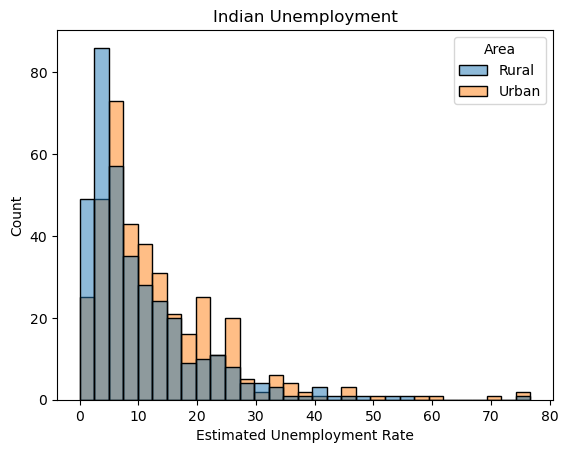

In [43]:
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue="Area",data=dataset) #the Area consists of Urban and Rural
plt.show()

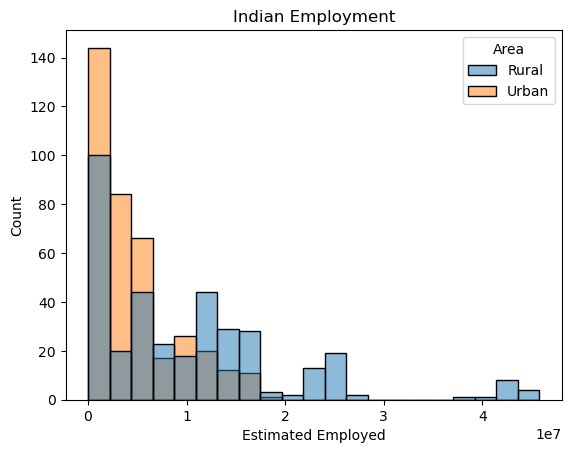

In [39]:
plt.title("Indian Employment")
sns.histplot(x="Estimated Employed",hue="Area",data=dataset)
plt.show()

This is the way we can analyze the unemployment rate by using Python programming language. 